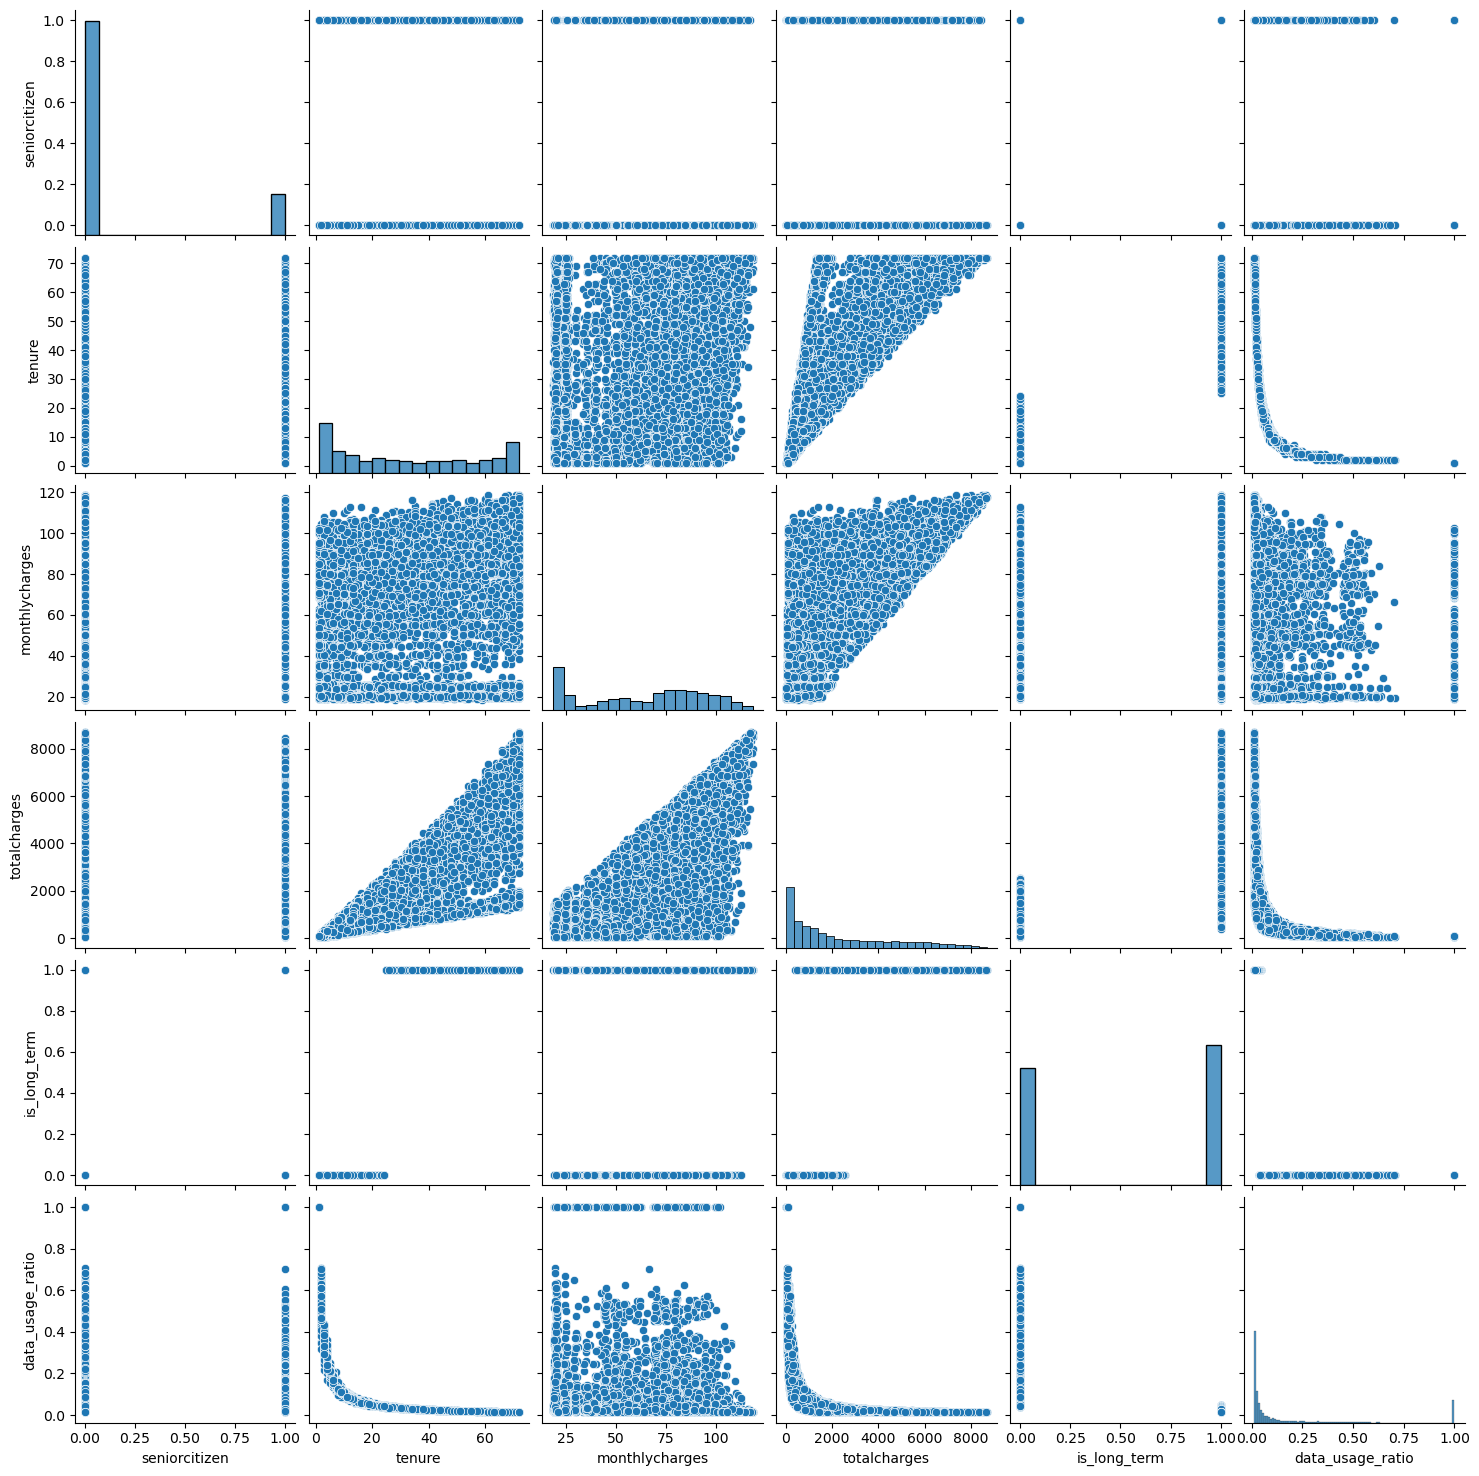

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Step 1: Load the dataset and inspect it
data = pd.read_csv("Telco_Customer_Churn.csv")

# Step 2: Data Preprocessing
# Standardize column names to lowercase
data.columns = data.columns.str.lower()

# Handle missing values
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')
data.dropna(subset=['totalcharges'], inplace=True)

# Step 3: Outlier Detection and Handling (using IQR method)
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

data = handle_outliers_iqr(data, 'tenure')
data = handle_outliers_iqr(data, 'monthlycharges')
data = handle_outliers_iqr(data, 'totalcharges')

# Step 4: Feature Engineering
# Step 4: Feature Engineering
data['is_long_term'] = (data['tenure'] > 24).astype(int)
data['data_usage_ratio'] = data['monthlycharges'] / data['totalcharges']


# Step 5: Data Visualization
sns.pairplot(data)
plt.show()

# Step 6: Split the data into training and testing sets
X = data.drop("churn", axis=1)
y = data["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Export the cleaned dataset to a CSV file
data.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)
